# PROYECTO Machine Learning

* El problema o necesidad que queremos resolver con un proyecto de ML utilizando el conjunto de datos "Online Shoppers Purchasing Intention" es comprender y predecir la intención de compra de los usuarios en línea. 
* Un modelo de Machine Learning puede ayudar a predecir las ventas futuras en función de la intención de compra de los usuarios. 

## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle
import mlflow.sklearn

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc

## Dataset

In [7]:
df = pd.read_csv( r"C:\Users\axa\THE BRIDGE_23\SEMANA 24. CORE. PROYECTO ML\81. PROYECTO ML\src\data\raw\online_shoppers_intention.csv", sep=",")

In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [10]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Transformación de Variables Booleanas a Númericas

In [11]:
le = LabelEncoder()

In [12]:
df["Weekend"] = le.fit_transform(df["Weekend"])

In [13]:
df["Revenue"] = le.fit_transform(df["Revenue"])

## Transformación de variables "Objeto" a Variables Dummies

In [14]:
# Transformar la columna "Month" en variables Dummies (sólo hay 10 meses, y elimininar la primera columna de las 10 para evitar Multicolinealidad)
df_dummies_Month = pd.get_dummies(df, columns=['Month'], prefix='Month', drop_first=True)

In [15]:
# Transformar la columna "VisitorType" en variables Dummies y eliminar la primera columna para evitar Multicolinealidad
df_transformado = pd.get_dummies(df_dummies_Month, columns=['VisitorType'], prefix='VisitorType', drop_first=True)

## EDA

* Basándonos en el EDA previo, la variable dependiente "Revenue" y las variables independientes, NO SIGUEN UNA DISTRIBUCION NORMAL.
* La Variable "Revenue" está altamente Desbalanceada. (84,5% No Compra y 15,5% Si Compra)
* La variable " OperatingSystems" tiene 1ª clase que representa el 53,54%, una 2ª clase que representa el 20,97% y una 3ª clase con el 20,72%, entre los tres Sistemas Operativos suman el 95% del dataset
* La Variable "Browser" sólo 3 Navegadores suman el 90% de los datos.
* La Variable "Month", llama la atención que en el Mes de Noviembre es cuando se producen el mayor porcentaje de las Compras que en los otros meses. 
* La Variable "VisitorType" Más del 85% son visitantes que retornan.
* La Variable "TraficType", tiene más de 20 valores distintos, la Variable no sigue una distribución normal, está distribuida exponencialmente.
* La Variable "Región" muestra 9 valores distintos y tampoco sigue una distribución normal.


## Correlaciones

In [16]:
matriz_correlacion = df_transformado.corr()

<Axes: >

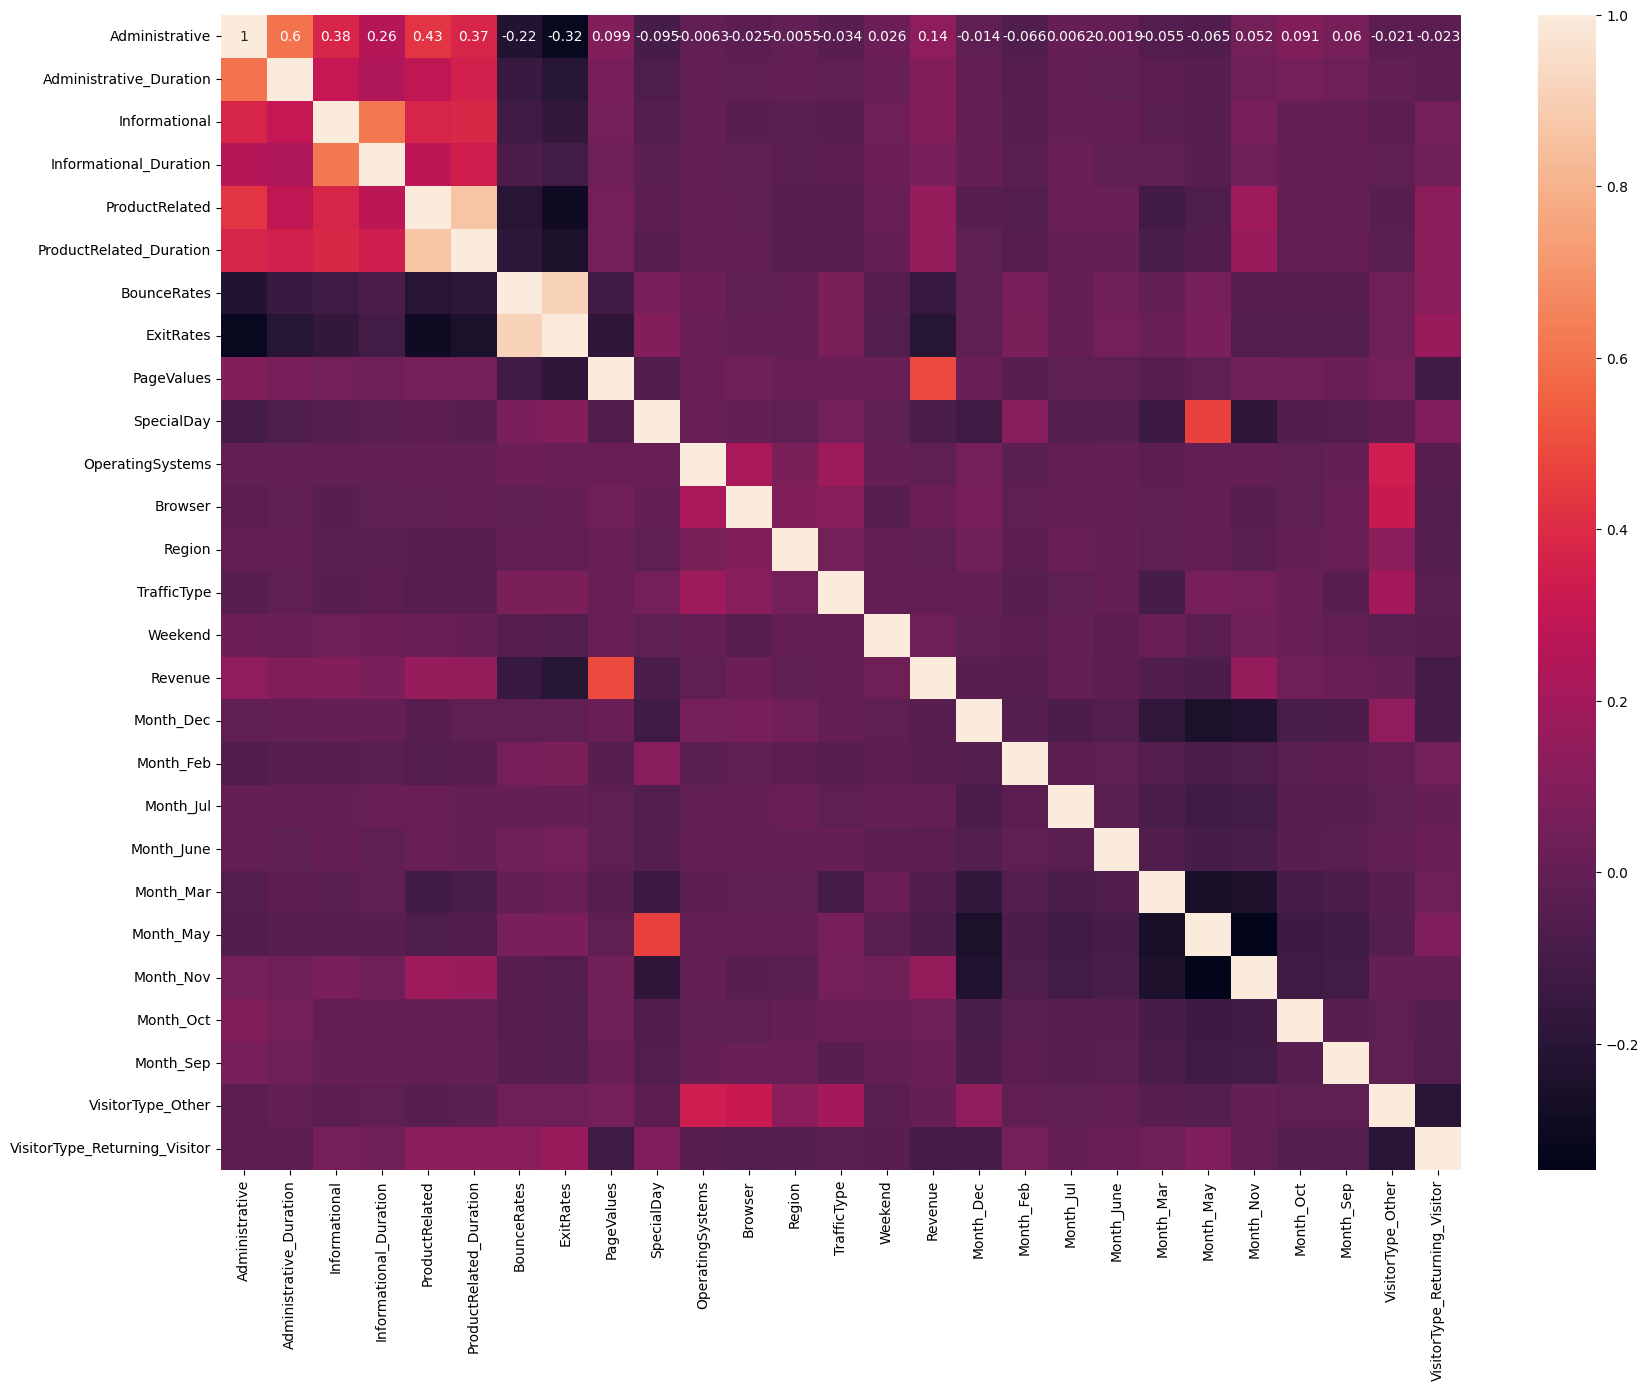

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(matriz_correlacion,annot=True)

## Estandarizar / Escalar / Normalizar

In [18]:
caracteristicas_a_escalar = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                            'OperatingSystems','Browser', 'Region', 'TrafficType', "Weekend"]

caracteristicas_numericas = df_transformado[caracteristicas_a_escalar]

sc = StandardScaler()

escaladas = sc.fit_transform(caracteristicas_numericas)

df_transformado[caracteristicas_a_escalar] = escaladas

## Modelo 1: RandomForestClassifier

* Separar los datos en dos grupos: datos de Entrenamiento (70%) y test (30%).
* Entrenar el Modelo 1, como un Bosque Aleatorio (Random Forest) utilizando todas las características (26 variables) con la variable dependiente desbalanceada.
* Evaluar la importancia de cada característica para saber cuáles son las características más relevantes, utilizar el atributo "feature_importances_"
* Ajustar los hiperparámetros del modelo, como el número de árboles y la profundidad máxima del árbol, para obtener un modelo inicial sólido.
* Elegir el mejor modelo

In [19]:
X = df_transformado.drop('Revenue', axis=1)  
y = df_transformado['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [20]:
modeloRFC = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=10, random_state=1)
modeloRFC.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=1)

In [21]:
y_pred = modeloRFC.predict(X_test)

In [22]:
feature_importance = modeloRFC.feature_importances_
feature_importance

array([2.98312337e-02, 3.25664774e-02, 1.02275302e-02, 1.52001932e-02,
       6.26939793e-02, 7.09555214e-02, 4.65983502e-02, 9.50022800e-02,
       4.94148753e-01, 4.80626970e-03, 8.07580524e-03, 9.81497077e-03,
       1.31585857e-02, 1.62032435e-02, 4.80199602e-03, 4.39896892e-03,
       2.10260226e-04, 2.66395009e-03, 1.46567974e-03, 7.85147968e-03,
       1.08164682e-02, 3.78980776e-02, 4.07936859e-03, 4.34950962e-03,
       3.73440942e-04, 1.18076067e-02])

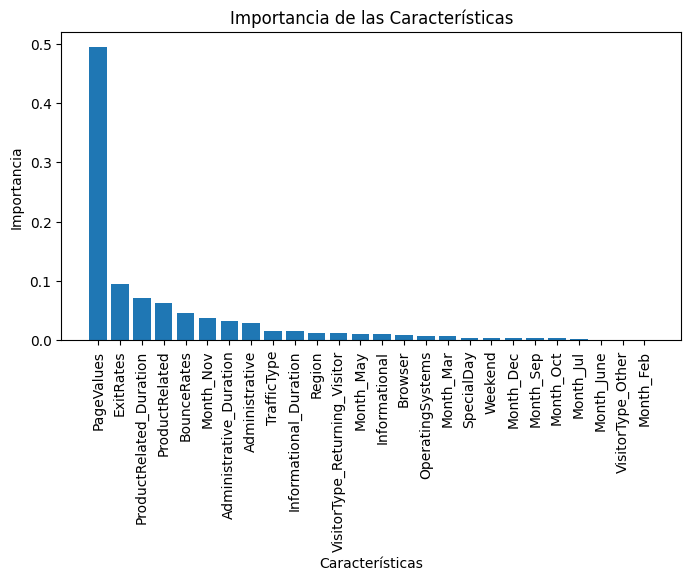

In [23]:
sorted_indices = np.argsort(feature_importance)[::-1]
feature_labels = X.columns
sorted_labels = [feature_labels[i] for i in sorted_indices]
sorted_importance = [feature_importance[i] for i in sorted_indices]

plt.figure(figsize=(8,4))
plt.bar(range(len(sorted_importance)), sorted_importance)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(range(len(sorted_importance)), sorted_labels, rotation=90)
plt.title('Importancia de las Características')
plt.show()

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, modeloRFC.predict_proba(X_test)[:, 1])
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy modeloRFC: {accuracy}')
print(f'Precision modeloRFC: {precision}')
print(f'Recall modeloRFC: {recall}')
print(f'F1-Score modeloRFC: {f1}')
print(f'AUC-ROC modeloRFC: {roc_auc}')
print('Matriz de Confusión modeloRFC:')
print(confusion)

Accuracy modeloRFC: 0.8824006488240065
Precision modeloRFC: 0.5775978407557355
Recall modeloRFC: 0.7781818181818182
F1-Score modeloRFC: 0.6630518977536793
AUC-ROC modeloRFC: 0.9254649383642715
Matriz de Confusión modeloRFC:
[[2836  313]
 [ 122  428]]


In [25]:
param_grid = {'n_estimators': [100, 200, 300],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],}
modeloRFC = RandomForestClassifier(class_weight="balanced", random_state=1)
grid_search = GridSearchCV(modeloRFC, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [26]:
best_model_RFC = grid_search.best_estimator_
best_model_RFC.fit(X_train, y_train)
y_pred_best_RFC = best_model_RFC.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred_best_RFC)
precision = precision_score(y_test, y_pred_best_RFC)
recall = recall_score(y_test, y_pred_best_RFC)
f1 = f1_score(y_test, y_pred_best_RFC)
roc_auc = roc_auc_score(y_test, best_model_RFC.predict_proba(X_test)[:, 1])
confusion = confusion_matrix(y_test, y_pred_best_RFC)

# Imprimir las métricas
print(f'Accuracy best_model_RFC: {accuracy}')
print(f'Precision best_model_RFC: {precision}')
print(f'Recall best_model_RFC: {recall}')
print(f'F1-Score best_model_RFC: {f1}')
print(f'AUC-ROC best_model_RFC: {roc_auc}')
print('Matriz de Confusión best_model_RFC:')
print(confusion)

Accuracy best_model_RFC: 0.8902406055690727
Precision best_model_RFC: 0.6071428571428571
Recall best_model_RFC: 0.7418181818181818
F1-Score best_model_RFC: 0.6677577741407528
AUC-ROC best_model_RFC: 0.9303132307514651
Matriz de Confusión best_model_RFC:
[[2885  264]
 [ 142  408]]


## Modelo 2: Gradient Boosting Classifier

* Separar los datos en dos grupos: datos de Entrenamiento (70%) y test (30%).
* Entrenar el Modelo 2, con Gradient Boosting Classifier (Ensamblador) utilizando todas las características (26 variables) y con la variable dependiente desbalanceada.
* Ajustar los hiperparámetros del modelo.
* Elegir el mejor modelo, ajustando los hiperparámetros.

In [28]:
X = df_transformado.drop('Revenue', axis=1)
y = df_transformado['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [29]:
modeloGBC = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=1)
modeloGBC.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [30]:
y_pred = modeloGBC.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, modeloGBC.predict_proba(X_test)[:, 1])
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy modeloGBC: {accuracy}')
print(f'Precision modeloGBC: {precision}')
print(f'Recall modeloGBC: {recall}')
print(f'F1-Score modeloGBC: {f1}')
print(f'AUC-ROC modeloGBC: {roc_auc}')
print('Matriz de Confusión modeloGBC:')
print(confusion)

Accuracy modeloGBC: 0.9024060556907272
Precision modeloGBC: 0.7058823529411765
Recall modeloGBC: 0.5890909090909091
F1-Score modeloGBC: 0.6422200198216057
AUC-ROC modeloGBC: 0.9302058373509627
Matriz de Confusión modeloGBC:
[[3014  135]
 [ 226  324]]


In [32]:
param_grid = {'n_estimators': [100, 200, 300],'learning_rate': [0.01, 0.1, 0.2],'max_depth': [3, 4, 5]}
modeloGBC= GradientBoostingClassifier(random_state=1)
grid_search = GridSearchCV(modeloGBC, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

best_model_GBC = grid_search.best_estimator_

cv_scores = cross_val_score(best_model_GBC, X_train, y_train, cv=5, scoring='f1')
print("Puntuaciones de Validación Cruzada (F1-score):", cv_scores)
print("Promedio de F1-score en Validación Cruzada:", np.mean(cv_scores))

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Puntuaciones de Validación Cruzada (F1-score): [0.67729084 0.67992048 0.67976424 0.65050505 0.65858586]
Promedio de F1-score en Validación Cruzada: 0.6692132932992807


In [33]:
best_model_GBC = grid_search.best_estimator_
best_model_GBC.fit(X_train, y_train)
y_pred_best_GBC = best_model_GBC.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred_best_GBC)
precision = precision_score(y_test, y_pred_best_GBC)
recall = recall_score(y_test, y_pred_best_GBC)
f1 = f1_score(y_test, y_pred_best_GBC)
roc_auc = roc_auc_score(y_test, best_model_GBC.predict_proba(X_test)[:, 1])
confusion = confusion_matrix(y_test, y_pred_best_GBC)

print(f'Accuracy best_model_GBC: {accuracy}')
print(f'Precision best_model_GBC: {precision}')
print(f'Recall best_model_GBC: {recall}')
print(f'F1-Score best_model_GBC: {f1}')
print(f'AUC-ROC best_model_GBC: {roc_auc}')
print('Matriz de Confusión best_model_GBC:')
print(confusion)

Accuracy best_model_GBC: 0.9024060556907272
Precision best_model_GBC: 0.7058823529411765
Recall best_model_GBC: 0.5890909090909091
F1-Score best_model_GBC: 0.6422200198216057
AUC-ROC best_model_GBC: 0.9302058373509627
Matriz de Confusión best_model_GBC:
[[3014  135]
 [ 226  324]]


## Modelo 3: Ada Boost Classifier

* Separar los datos en dos grupos: datos de Entrenamiento (70%) y Test (30%)
* Entrenar el Modelo 3, con Ada Boost Classifier (Ensamblador) utilizando todas las características (26 variables) y con la variable dependiente desbalanceada.
* Ajustar los hiperparámetros del modelo.
* Elegir el mejor modelo, ajustadando los hiperparámetros.

In [35]:
X = df_transformado.drop('Revenue', axis=1)
y = df_transformado['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [36]:
modeloABC= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=1)
modeloABC.fit(X_train, y_train)

c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=1)

In [37]:
y_pred = modeloABC.predict(X_test)

In [38]:
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, modeloABC.predict_proba(X_test)[:, 1])
confusion= confusion_matrix(y_test, y_pred)

print("Accuracy modeloABC:", accuracy)
print("Precisión modeloABC:", precision)
print("Recall modeloABC:", recall)
print("F1-Score modeloABC:", f1)
print("AUC-ROC modeloABC:", roc_auc)
print("Matriz de Confusión modeloABC:")
print(confusion)

Accuracy modeloABC: 0.8875371722087051
Precisión modeloABC: 0.6372950819672131
Recall modeloABC: 0.5654545454545454
F1-Score modeloABC: 0.5992292870905588
AUC-ROC modeloABC: 0.9110312075983718
Matriz de Confusión modeloABC:
[[2972  177]
 [ 239  311]]


In [39]:
feature_importance = modeloABC.feature_importances_

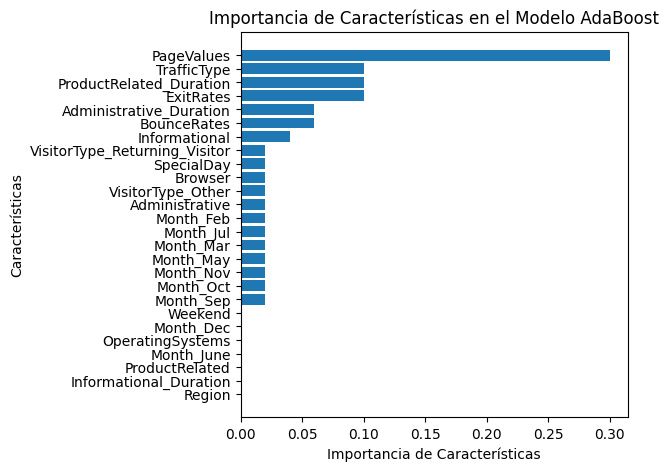

In [40]:
feature_names = X.columns
sorted_indices = np.argsort(feature_importance)
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(5,5))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Importancia de Características')
plt.ylabel('Características')
plt.title('Importancia de Características en el Modelo AdaBoost')
plt.show()

In [41]:
param_grid = {'n_estimators': [50, 100, 150],'learning_rate': [0.01, 0.1, 1.0],'base_estimator__max_depth': [1, 2, 3]}
modeloABC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=1)
grid_search = GridSearchCV(modeloABC, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be rem

Mejores hiperparámetros: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 50}


In [42]:
best_model_ABC = grid_search.best_estimator_
best_model_ABC.fit(X_train, y_train)
y_pred_best_ABC = best_model_ABC.predict(X_test)

c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [43]:
accuracy_best_ABC = accuracy_score(y_test, y_pred_best_ABC)
precision_best_ABC = precision_score(y_test, y_pred_best_ABC)
recall_best_ABC = recall_score(y_test, y_pred_best_ABC)
f1_best_ABC = f1_score(y_test, y_pred_best_ABC)
roc_auc_best_ABC = roc_auc_score(y_test, best_model_ABC.predict_proba(X_test)[:, 1])
confusion_best_ABC = confusion_matrix(y_test, y_pred_best_ABC)

print("Accuracy best_model_ABC:", accuracy_best_ABC)
print("Precisión best_model_ABC:", precision_best_ABC)
print("Recall best_model_ABC:", recall_best_ABC)
print("F1-Score best_model_ABC:", f1_best_ABC)
print("AUC-ROC best_model_ABC:", roc_auc_best_ABC)
print("Matriz de Confusión best_model_ABC:")
print(confusion_best_ABC)

Accuracy best_model_ABC: 0.8723979453906461
Precisión best_model_ABC: 0.5537190082644629
Recall best_model_ABC: 0.730909090909091
F1-Score best_model_ABC: 0.6300940438871473
AUC-ROC best_model_ABC: 0.8434518894887265
Matriz de Confusión best_model_ABC:
[[2825  324]
 [ 148  402]]


## Modelo 4: BalancedRandomForest

In [44]:
X = df_transformado.drop('Revenue', axis=1)
y = df_transformado['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [45]:
modeloBRF = BalancedRandomForestClassifier(n_estimators=100, max_depth=5, class_weight= "balanced", random_state=1)
modeloBRF.fit(X_train, y_train)

c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(class_weight='balanced', max_depth=5,
                               random_state=1)

In [46]:
y_pred_BRF = modeloBRF.predict(X_test)

In [47]:
accuracy_BRF = accuracy_score(y_test, y_pred_BRF)
precision_BRF = precision_score(y_test, y_pred_BRF)
recall_BRF = recall_score(y_test, y_pred_BRF)
f1_BRF = f1_score(y_test, y_pred_BRF)
roc_auc_BRF = roc_auc_score(y_test, modeloBRF.predict_proba(X_test)[:, 1])
conf_matrix_BRF = confusion_matrix(y_test, y_pred_BRF)

print("Accuracy modeloBRF:", accuracy_BRF)
print("Precision modeloBRF:", precision_BRF)
print("Recall modeloBRF:", recall_BRF)
print("F1-score modeloBRF:", f1_BRF)
print("AUC-ROC modeloBRF:", roc_auc_BRF)
print("Matriz de Confusión modeloBRF:")
print(conf_matrix_BRF)

Accuracy modeloBRF: 0.5355501486888348
Precision modeloBRF: 0.24113475177304963
Recall modeloBRF: 0.9890909090909091
F1-score modeloBRF: 0.3877405559515324
AUC-ROC modeloBRF: 0.9158913363549757
Matriz de Confusión modeloBRF:
[[1437 1712]
 [   6  544]]


In [48]:
param_grid = {'n_estimators': [300, 500, 800],'max_depth': [15, 20, 25],'min_samples_split': [1, 2, 3]}
modeloBRF = BalancedRandomForestClassifier(class_weight="balanced", random_state=1)
grid_search = GridSearchCV(modeloBRF, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and a

Mejores hiperparámetros: {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 500}


In [49]:
best_model_BRF = grid_search.best_estimator_
best_model_BRF.fit(X_train, y_train)
y_pred_best = best_model_BRF.predict(X_test)

c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


In [50]:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, best_model_BRF.predict_proba(X_test)[:, 1])
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print("Accuracy best_model_BRF:", accuracy_best)
print("Precision best_model_BRF:", precision_best)
print("Recall best_model_BRF:", recall_best)
print("F1-score best_model_BRF:", f1_best)
print("AUC-ROC best_model_BRF:", roc_auc_best)
print("Matriz de Confusión best_model_BRF:")
print(conf_matrix_best)

Accuracy best_model_BRF: 0.8569883752365505
Precision best_model_BRF: 0.5113759479956663
Recall best_model_BRF: 0.8581818181818182
F1-score best_model_BRF: 0.6408689748811949
AUC-ROC best_model_BRF: 0.929044140997142
Matriz de Confusión best_model_BRF:
[[2698  451]
 [  78  472]]


## Modelo 5: Naive Bayes  Gaussian NB

In [51]:
X = df_transformado.drop('Revenue', axis=1)
y = df_transformado['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [52]:
modeloNB= GaussianNB()
modeloNB.fit(X_train, y_train)

GaussianNB()

In [53]:
y_pred = modeloNB.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, modeloNB.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy modeloNB:", accuracy)
print("Precision modeloNB:", precision)
print("Recall modeloNB:", recall)
print("F1-score modeloNB:", f1)
print("AUC-ROC modeloNB:", roc_auc)
print("Matriz de Confusión modeloNB:")
print(conf_matrix)

Accuracy modeloNB: 0.7220870505542039
Precision modeloNB: 0.32805755395683456
Recall modeloNB: 0.8290909090909091
F1-score modeloNB: 0.4701030927835052
AUC-ROC modeloNB: 0.8308989866913017
Matriz de Confusión modeloNB:
[[2215  934]
 [  94  456]]


### Balancear los datos de la variable Dependiente

In [55]:
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [56]:
modeloNB= GaussianNB()
modeloNB.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [57]:
y_pred = modeloNB.predict(X_test)

In [58]:
accuracy_oversampled = accuracy_score(y_test, y_pred)
precision_oversampled = precision_score(y_test, y_pred)
recall_oversampled = recall_score(y_test, y_pred)
f1_oversampled = f1_score(y_test, y_pred)
roc_auc_oversampled = roc_auc_score(y_test, modeloNB.predict_proba(X_test)[:, 1])
conf_matrix_oversampled = confusion_matrix(y_test, y_pred)

print("Accuracy modeloNB:", accuracy_oversampled)
print("Precision modeloNB:", precision_oversampled)
print("Recall modeloNB:", recall_oversampled)
print("F1-score modeloNB:", f1_oversampled)
print("AUC-ROC modeloNB:", roc_auc_oversampled)
print("Matriz de Confusión modeloNB:")
print(conf_matrix_oversampled)

Accuracy modeloNB: 0.5520410921870776
Precision modeloNB: 0.2387918829636621
Recall modeloNB: 0.92
F1-score modeloNB: 0.37916822780067444
AUC-ROC modeloNB: 0.8356274719247092
Matriz de Confusión modeloNB:
[[1536 1613]
 [  44  506]]


In [59]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
modeloNB = GaussianNB()
grid_search = GridSearchCV(modeloNB, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'var_smoothing': 1e-06}


In [60]:
best_model_NB = grid_search.best_estimator_
best_model_NB.fit(X_train, y_train)
y_pred_best_NB = best_model_NB.predict(X_test)

In [61]:
accuracy_best_NB = accuracy_score(y_test, y_pred_best_NB)
precision_best_NB = precision_score(y_test, y_pred_best_NB)
recall_best_NB = recall_score(y_test, y_pred_best_NB)
f1_best_NB = f1_score(y_test, y_pred_best_NB)
roc_auc_best_NB = roc_auc_score(y_test, best_model_NB.predict_proba(X_test)[:, 1])
conf_matrix_best_NB = confusion_matrix(y_test, y_pred_best_NB)

print("Accuracy best_model_NB:", accuracy_best_NB)
print("Precision best_model_NB:", precision_best_NB)
print("Recall best_model_NB:", recall_best_NB)
print("F1-Score best_model_NB:", f1_best_NB)
print("AUC-ROC best_model_NB:", roc_auc_best_NB)
print("Matriz de Confusión best_model_NB:")
print(conf_matrix_best_NB)

Accuracy best_model_NB: 0.7220870505542039
Precision best_model_NB: 0.32805755395683456
Recall best_model_NB: 0.8290909090909091
F1-Score best_model_NB: 0.4701030927835052
AUC-ROC best_model_NB: 0.8308989866913017
Matriz de Confusión best_model_NB:
[[2215  934]
 [  94  456]]


## Modelo 6: SVC

In [62]:
X = df_transformado.drop('Revenue', axis=1)
y = df_transformado['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [63]:
modeloSVC = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=1)
modeloSVC.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=1)

In [64]:
y_pred_SVC = modeloSVC.predict(X_test)

In [65]:
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
precision_SVC = precision_score(y_test, y_pred_SVC)
recall_SVC = recall_score(y_test, y_pred_SVC)
f1_SVC = f1_score(y_test, y_pred_SVC)
roc_auc_SVC = roc_auc_score(y_test, modeloSVC.decision_function(X_test))
conf_matrix_SVC = confusion_matrix(y_test, y_pred_SVC)

print("Accuracy modeloSVC:", accuracy_SVC)
print("Precision modeloSVC:", precision_SVC)
print("Recall modeloSVC:", recall_SVC)
print("F1-score modeloSVC:", f1_SVC)
print("AUC-ROC modeloSVC:", roc_auc_SVC)
print("Matriz de Confusión modeloSVC:")
print(conf_matrix_SVC)

Accuracy modeloSVC: 0.8648283319816167
Precision modeloSVC: 0.532051282051282
Recall modeloSVC: 0.7545454545454545
F1-score modeloSVC: 0.6240601503759399
AUC-ROC modeloSVC: 0.9005398539218799
Matriz de Confusión modeloSVC:
[[2784  365]
 [ 135  415]]


In [66]:
param_grid = {'C': [1, 10],'gamma': [0.1, 1]}
modeloSVC = SVC(class_weight='balanced', random_state=1)
grid_search = GridSearchCV(modeloSVC, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_resampled, y_train_resampled)
best_params_SVC = grid_search.best_params_
print("Mejores hiperparámetros para SVC:", best_params_SVC)

Mejores hiperparámetros para SVC: {'C': 10, 'gamma': 1}


In [67]:
best_model_SVC = grid_search.best_estimator_
best_model_SVC.fit(X_train, y_train)
y_pred_best_SVC = best_model_SVC.predict(X_test)

In [68]:
accuracy_best_SVC = accuracy_score(y_test, y_pred_best_SVC)
precision_best_SVC = precision_score(y_test, y_pred_best_SVC)
recall_best_SVC = recall_score(y_test, y_pred_best_SVC)
f1_best_SVC = f1_score(y_test, y_pred_best_SVC)
roc_auc_best_SVC = roc_auc_score(y_test, best_model_SVC.decision_function(X_test))
conf_matrix_best_SVC = confusion_matrix(y_test, y_pred_best_SVC)

print("Accuracy best_model_SVC:", accuracy_best_SVC)
print("Precision best_model_SVC:", precision_best_SVC)
print("Recall best_model_SVC:", recall_best_SVC)
print("F1-Score best_model_SVC:", f1_best_SVC)
print("AUC-ROC best_model_SVC:", roc_auc_best_SVC)
print("Matriz de Confusión best_model_SVC:")
print(conf_matrix_best_SVC)

Accuracy best_model_SVC: 0.8548256285482563
Precision best_model_SVC: 0.5359116022099447
Recall best_model_SVC: 0.17636363636363636
F1-Score best_model_SVC: 0.2653898768809849
AUC-ROC best_model_SVC: 0.8336031640636277
Matriz de Confusión best_model_SVC:
[[3065   84]
 [ 453   97]]


## Modelo 7: Logistic Regression

In [69]:
X = df_transformado.drop('Revenue', axis=1)
y = df_transformado['Revenue'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [70]:
modeloLogReg = LogisticRegression(class_weight='balanced', penalty='l2', C=1.0, solver='liblinear', random_state=1, max_iter=1000, fit_intercept=True,dual=False, warm_start=True)
modeloLogReg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=1,
                   solver='liblinear', warm_start=True)

In [71]:
y_pred_LogReg = modeloLogReg.predict(X_test)

In [72]:
accuracy_LogReg = accuracy_score(y_test, y_pred_LogReg)
precision_LogReg = precision_score(y_test, y_pred_LogReg)
recall_LogReg = recall_score(y_test, y_pred_LogReg)
f1_LogReg = f1_score(y_test, y_pred_LogReg)
roc_auc_LogReg = roc_auc_score(y_test, modeloLogReg.predict_proba(X_test)[:, 1])
conf_matrix_LogReg = confusion_matrix(y_test, y_pred_LogReg)

print("Accuracy modeloLogReg:", accuracy_LogReg)
print("Precision modeloLogReg:", precision_LogReg)
print("Recall modeloLogReg:", recall_LogReg)
print("F1-score modeloLogReg:", f1_LogReg)
print("AUC-ROC modeloLogReg:", roc_auc_LogReg)
print("Matriz de Confusión modeloLogReg:")
print(conf_matrix_LogReg)

Accuracy modeloLogReg: 0.8545552852122196
Precision modeloLogReg: 0.5070257611241218
Recall modeloLogReg: 0.7872727272727272
F1-score modeloLogReg: 0.6168091168091168
AUC-ROC modeloLogReg: 0.9095297208348971
Matriz de Confusión modeloLogReg:
[[2728  421]
 [ 117  433]]


In [73]:
param_grid = {'penalty': ['l1', 'l2'],'C': [1, 10, 100],'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(modeloLogReg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_LogReg = grid_search.best_params_
print("Mejores hiperparámetros para Regresión Logística:", best_params_LogReg)

Mejores hiperparámetros para Regresión Logística: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [74]:
best_model_LogReg = grid_search.best_estimator_
best_model_LogReg.fit(X_train, y_train)
y_pred_LogReg = best_model_LogReg.predict(X_test)

In [75]:
accuracy_LogReg = accuracy_score(y_test, y_pred_LogReg)
precision_LogReg = precision_score(y_test, y_pred_LogReg)
recall_LogReg = recall_score(y_test, y_pred_LogReg)
f1_LogReg = f1_score(y_test, y_pred_LogReg)
roc_auc_LogReg = roc_auc_score(y_test, best_model_LogReg.predict_proba(X_test)[:, 1])
confusion_matrix_LogReg = confusion_matrix(y_test, y_pred_LogReg)

print("Accuracy best_model_LogReg:", accuracy_LogReg)
print("Precisión best_model_LogReg:", precision_LogReg)
print("Recall best_model_LogReg:", recall_LogReg)
print("F1-Score best_model_LogReg:", f1_LogReg)
print("AUC-ROC best_model_LogReg:", roc_auc_LogReg)
print("Matriz de Confusión best_model_LogReg:")
print(confusion_matrix_LogReg)

Accuracy best_model_LogReg: 0.8545552852122196
Precisión best_model_LogReg: 0.5070257611241218
Recall best_model_LogReg: 0.7872727272727272
F1-Score best_model_LogReg: 0.6168091168091168
AUC-ROC best_model_LogReg: 0.9096036259707269
Matriz de Confusión best_model_LogReg:
[[2728  421]
 [ 117  433]]


## Modelo 8: KNN

In [76]:
X = df_transformado.drop('Revenue', axis=1)
y = df_transformado['Revenue']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [77]:
modeloKNN = KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto', leaf_size=30, p=2,metric='minkowski')
modeloKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [78]:
y_pred_KNN = modeloKNN.predict(X_test)

In [79]:
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN)
recall_KNN = recall_score(y_test, y_pred_KNN)
f1_KNN = f1_score(y_test, y_pred_KNN)
roc_auc_KNN = roc_auc_score(y_test, modeloKNN.predict_proba(X_test)[:, 1])
conf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)

print("Accuracy modeloKNN:", accuracy_KNN)
print("Precision modeloKNN:", precision_KNN)
print("Recall modeloKNN:", recall_KNN)
print("F1-score modeloKNN:", f1_KNN)
print("AUC-ROC modeloKNN:", roc_auc_KNN)
print("Matriz de Confusión modeloKNN:")
print(conf_matrix_KNN)

Accuracy modeloKNN: 0.8810489321438226
Precision modeloKNN: 0.6909722222222222
Recall modeloKNN: 0.3618181818181818
F1-score modeloKNN: 0.4749403341288782
AUC-ROC modeloKNN: 0.836491238199717
Matriz de Confusión modeloKNN:
[[3060   89]
 [ 351  199]]


In [80]:
param_grid = {'n_neighbors': [5, 10, 15],'weights': ['uniform', 'distance'],'p': [1, 2]}

modeloKNN = KNeighborsClassifier()
grid_search = GridSearchCV(modeloKNN, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_params_KNN = grid_search.best_params_
print("Mejores hiperparámetros para KNN:", best_params_KNN)

Mejores hiperparámetros para KNN: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [81]:
best_model_KNN = grid_search.best_estimator_
best_model_KNN.fit(X_train, y_train)
y_pred_best_KNN = best_model_KNN.predict(X_test)

In [82]:
accuracy_best_KNN = accuracy_score(y_test, y_pred_best_KNN)
precision_best_KNN = precision_score(y_test, y_pred_best_KNN)
recall_best_KNN = recall_score(y_test, y_pred_best_KNN)
f1_best_KNN = f1_score(y_test, y_pred_best_KNN)
roc_auc_best_KNN = roc_auc_score(y_test, best_model_KNN.predict_proba(X_test)[:, 1])
conf_matrix_best_KNN = confusion_matrix(y_test, y_pred_best_KNN)

print("Accuracy best_model_KNN:", accuracy_best_KNN)
print("Precision best_model_KNN:", precision_best_KNN)
print("Recall best_model_KNN:", recall_best_KNN)
print("F1-score best_model_KNN:", f1_best_KNN)
print("AUC-ROC best_model_KNN:", roc_auc_best_KNN)
print("Matriz de Confusión best_model_KNN:")
print(conf_matrix_best_KNN)

Accuracy best_model_KNN: 0.8826709921600433
Precision best_model_KNN: 0.6726190476190477
Recall best_model_KNN: 0.4109090909090909
F1-score best_model_KNN: 0.510158013544018
AUC-ROC best_model_KNN: 0.8154525246109876
Matriz de Confusión best_model_KNN:
[[3039  110]
 [ 324  226]]


## Elección del mejor Modelo

* Accuracy: Mide la proporción de predicciones correctas en el conjunto de prueba.
* Precisión: Mide la proporción de predicciones positivas correctas entre todas las predicciones positivas.
* Recall: Mide la proporción de verdaderos positivos capturados entre todos los casos positivos reales.
* F1-Score: Combina la precisión y el recall en una sola métrica que equilibra ambas medidas.
* AUC-ROC: Mide el área bajo la curva ROC y evalúa la capacidad del modelo para distinguir entre clases positivas y negativas, útil para evaluar la capacidad de discriminación del modelo.
* Matriz de Confusión: Proporciona una visión detallada de los resultados de las predicciones, mostrando los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

In [83]:
metricas = {
    "Accuracy": [0.8824006488240065, 0.8902406055690727, 0.9024060556907272, 0.8826709921600433, 0.8875371722087051, 0.8723979453906461, 0.5355501486888348, 0.8569883752365505, 0.5520410921870776, 0.7220870505542039, 0.8648283319816167, 0.8548256285482563, 0.8545552852122196, 0.8545552852122196, 0.8810489321438226, 0.8826709921600433],
    "Precision": [0.5775978407557355, 0.6071428571428571, 0.7058823529411765, 0.6726190476190477, 0.6372950819672131, 0.5537190082644629, 0.24113475177304963, 0.5113759479956663, 0.2387918829636621, 0.32805755395683456, 0.532051282051282, 0.5359116022099447, 0.5070257611241218, 0.5070257611241218, 0.6909722222222222, 0.6726190476190477],
    "Recall": [0.7781818181818182, 0.7418181818181818, 0.5890909090909091, 0.4109090909090909, 0.5654545454545454, 0.730909090909091, 0.9890909090909091, 0.8581818181818182, 0.92, 0.8290909090909091, 0.7545454545454545, 0.17636363636363636, 0.7872727272727272, 0.7872727272727272, 0.3618181818181818, 0.4109090909090909],
    "F1-Score": [0.6630518977536793, 0.6677577741407528, 0.6422200198216057, 0.510158013544018, 0.5992292870905588, 0.6300940438871473, 0.3877405559515324, 0.6408689748811949, 0.37916822780067444, 0.4701030927835052, 0.6240601503759399, 0.2653898768809849, 0.6168091168091168, 0.6168091168091168, 0.4749403341288782, 0.510158013544018],
    "AUC-ROC": [0.9254649383642715, 0.9303132307514651, 0.9302058373509627, 0.8154525246109876, 0.9110312075983718, 0.8434518894887265, 0.9158913363549757, 0.929044140997142, 0.8356274719247092, 0.8308989866913017, 0.9005398539218799, 0.8336031640636277, 0.9095297208348971, 0.9096036259707269, 0.836491238199717, 0.8154525246109876]
}

modelos = [
    "modeloRFC", "best_model_RFC", "modeloGBC", "best_model_GBC",
    "modeloABC", "best_model_ABC", "modeloBRF", "best_model_BRF",
    "modeloNB", "best_model_NB", "modeloSVC", "best_model_SVC",
    "modeloLogReg", "best_model_LogReg", "modeloKNN", "best_model_KNN"
]

df_metricas_combinadas = pd.DataFrame(metricas, index=modelos)
print(df_metricas_combinadas)

                   Accuracy  Precision    Recall  F1-Score   AUC-ROC
modeloRFC          0.882401   0.577598  0.778182  0.663052  0.925465
best_model_RFC     0.890241   0.607143  0.741818  0.667758  0.930313
modeloGBC          0.902406   0.705882  0.589091  0.642220  0.930206
best_model_GBC     0.882671   0.672619  0.410909  0.510158  0.815453
modeloABC          0.887537   0.637295  0.565455  0.599229  0.911031
best_model_ABC     0.872398   0.553719  0.730909  0.630094  0.843452
modeloBRF          0.535550   0.241135  0.989091  0.387741  0.915891
best_model_BRF     0.856988   0.511376  0.858182  0.640869  0.929044
modeloNB           0.552041   0.238792  0.920000  0.379168  0.835627
best_model_NB      0.722087   0.328058  0.829091  0.470103  0.830899
modeloSVC          0.864828   0.532051  0.754545  0.624060  0.900540
best_model_SVC     0.854826   0.535912  0.176364  0.265390  0.833603
modeloLogReg       0.854555   0.507026  0.787273  0.616809  0.909530
best_model_LogReg  0.854555   0.50

# Accuracy

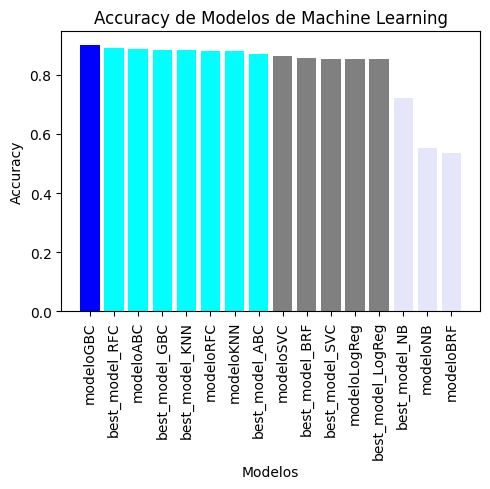

In [84]:
modelos = ["modeloRFC", "best_model_RFC", "modeloGBC", "best_model_GBC", "modeloABC", "best_model_ABC", "modeloBRF", "best_model_BRF", "modeloNB", "best_model_NB", "modeloSVC", "best_model_SVC", "modeloLogReg", "best_model_LogReg", "modeloKNN", "best_model_KNN"]
metricas = [0.8824006488240065, 0.8902406055690727, 0.9024060556907272, 0.8826709921600433, 0.8875371722087051, 0.8723979453906461, 0.5355501486888348, 0.8569883752365505, 0.5520410921870776, 0.7220870505542039, 0.8648283319816167, 0.8548256285482563, 0.8545552852122196, 0.8545552852122196, 0.8810489321438226, 0.8826709921600433]
df_metricas_combinadas = pd.DataFrame(metricas, index=modelos, columns=["Accuracy"])
df_metricas_combinadas = df_metricas_combinadas.sort_values(by="Accuracy", ascending=False)
colores = ['blue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'gray', 'gray', 'gray', 'gray', 'gray', 'lavender', 'lavender', 'lavender']
plt.figure(figsize=(5, 5))
plt.bar(df_metricas_combinadas.index, df_metricas_combinadas["Accuracy"], color=colores)
plt.xticks(rotation=90)
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Accuracy de Modelos de Machine Learning')
plt.tight_layout()
plt.show()

Accuracy: Si valoramos la precisión general del modelo para predecir correctamente las etiquetas, entonces "modeloGBC" tiene el Accuracy más alto (0.9024).

## Precisión

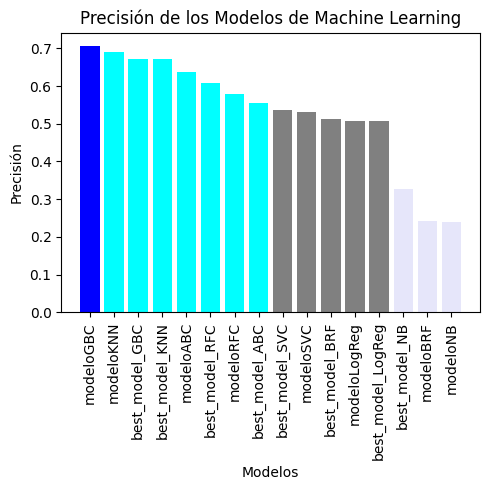

In [85]:
modelos = ["modeloRFC", "best_model_RFC", "modeloGBC", "best_model_GBC", "modeloABC", "best_model_ABC", "modeloBRF", "best_model_BRF", "modeloNB", "best_model_NB", "modeloSVC", "best_model_SVC", "modeloLogReg", "best_model_LogReg", "modeloKNN", "best_model_KNN"]
metricas = [0.5775978407557355, 0.6071428571428571, 0.7058823529411765, 0.6726190476190477, 0.6372950819672131, 0.5537190082644629, 0.24113475177304963, 0.5113759479956663, 0.2387918829636621, 0.32805755395683456, 0.532051282051282, 0.5359116022099447, 0.5070257611241218, 0.5070257611241218, 0.6909722222222222, 0.6726190476190477]
df_metricas_combinadas = pd.DataFrame(metricas, index=modelos, columns=["Precisión"])
df_metricas_combinadas = df_metricas_combinadas.sort_values(by="Precisión", ascending=False)
colores = ['blue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'gray', 'gray', 'gray', 'gray', 'gray', 'lavender', 'lavender', 'lavender']
plt.figure(figsize=(5, 5))
plt.bar(df_metricas_combinadas.index, df_metricas_combinadas["Precisión"], color=colores)
plt.xticks(rotation=90)
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Precisión de los Modelos de Machine Learning')
plt.tight_layout()
plt.show()

Precision: Si deseamos minimizar los falsos positivos (predecir positivo cuando es negativo), entonces "modeloGBC" tiene la Precision más alta. Esto significa que es un buen modelo para evitar falsas alarmas.

## Recall

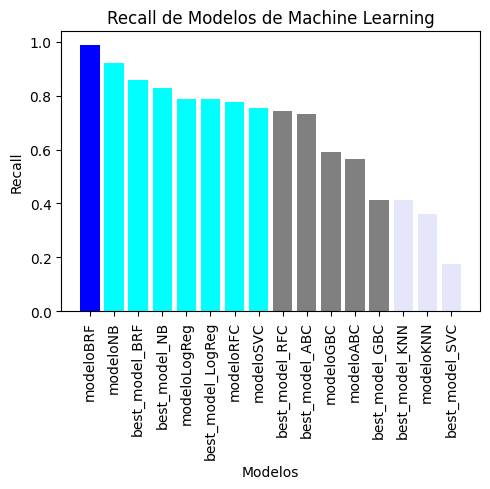

In [86]:
modelos = ["modeloRFC", "best_model_RFC", "modeloGBC", "best_model_GBC", "modeloABC", "best_model_ABC", "modeloBRF", "best_model_BRF", "modeloNB", "best_model_NB", "modeloSVC", "best_model_SVC", "modeloLogReg", "best_model_LogReg", "modeloKNN", "best_model_KNN"]
metricas = [0.7781818181818182, 0.7418181818181818, 0.5890909090909091, 0.4109090909090909, 0.5654545454545454, 0.730909090909091, 0.9890909090909091, 0.8581818181818182, 0.92, 0.8290909090909091, 0.7545454545454545, 0.17636363636363636, 0.7872727272727272, 0.7872727272727272, 0.3618181818181818, 0.4109090909090909]
df_metricas_combinadas = pd.DataFrame(metricas, index=modelos, columns=["Recall"])
df_metricas_combinadas = df_metricas_combinadas.sort_values(by="Recall", ascending=False)
colores = ['blue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'gray', 'gray', 'gray', 'gray', 'gray', 'lavender', 'lavender', 'lavender']
plt.figure(figsize=(5, 5))
plt.bar(df_metricas_combinadas.index, df_metricas_combinadas["Recall"], color=colores)
plt.xticks(rotation=90)
plt.xlabel('Modelos')
plt.ylabel('Recall')
plt.title('Recall de Modelos de Machine Learning')
plt.tight_layout()
plt.show()

Recall: Si deseamos minimizar los falsos negativos (predecir negativo cuando es positivo), entonces "modeloBRF" tiene el Recall más alto (0,9890). Esto significa que es bueno para capturar todos los casos positivos.

## F1-Score

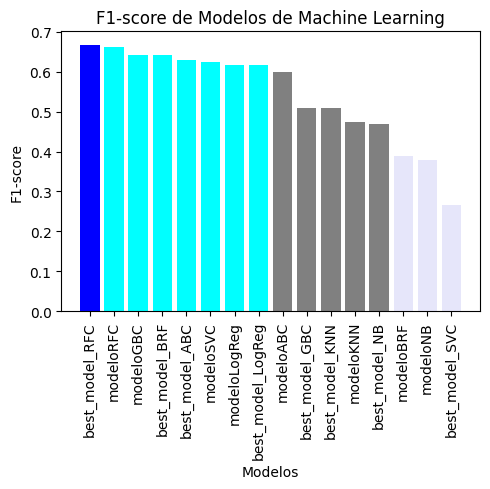

In [87]:
modelos = ["modeloRFC", "best_model_RFC", "modeloGBC", "best_model_GBC", "modeloABC", "best_model_ABC", "modeloBRF", "best_model_BRF", "modeloNB", "best_model_NB", "modeloSVC", "best_model_SVC", "modeloLogReg", "best_model_LogReg", "modeloKNN", "best_model_KNN"]
f1_scores = [0.6630518977536793, 0.6677577741407528, 0.6422200198216057, 0.510158013544018, 0.5992292870905588, 0.6300940438871473, 0.3877405559515324, 0.6408689748811949, 0.37916822780067444, 0.4701030927835052, 0.6240601503759399, 0.2653898768809849, 0.6168091168091168, 0.6168091168091168, 0.4749403341288782, 0.510158013544018]
df_metricas_combinadas = pd.DataFrame(f1_scores, index=modelos, columns=["F1-score"])
df_metricas_combinadas = df_metricas_combinadas.sort_values(by="F1-score", ascending=False)
colores = ['blue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'gray', 'gray', 'gray', 'gray', 'gray', 'lavender', 'lavender', 'lavender']
plt.figure(figsize=(5, 5))
plt.bar(df_metricas_combinadas.index, df_metricas_combinadas["F1-score"], color=colores)
plt.xticks(rotation=90)
plt.xlabel('Modelos')
plt.ylabel('F1-score')
plt.title('F1-score de Modelos de Machine Learning')
plt.tight_layout()
plt.show()

F1-Score: Si buscamos un equilibrio entre Precision y Recall, entonces podríamos mirar el F1-Score: "best_model_RFC" tiene un F1-Score bastante alto (0.6677).

## AUC-ROC

In [89]:
fpr_best_model_RFC, tpr_best_model_RFC, _ = roc_curve(y_test, best_model_RFC.predict_proba(X_test)[:, 1])
roc_auc_best_model_RFC = auc(fpr_best_model_RFC, tpr_best_model_RFC)

In [91]:
fpr_best_model_GBC, tpr_best_model_GBC, _ = roc_curve(y_test, best_model_GBC.predict_proba(X_test)[:, 1])
roc_auc_best_model_GBC = auc(fpr_best_model_GBC, tpr_best_model_GBC)

In [93]:
fpr_best_model_ABC, tpr_best_model_ABC, _ = roc_curve(y_test, best_model_ABC.predict_proba(X_test)[:, 1])
roc_auc_best_model_ABC = auc(fpr_best_model_ABC, tpr_best_model_ABC)

In [95]:
fpr_best_model_BRF, tpr_best_model_BRF, _ = roc_curve(y_test, best_model_BRF.predict_proba(X_test)[:, 1])
roc_auc_best_model_BRF = auc(fpr_best_model_BRF, tpr_best_model_BRF)

In [97]:
fpr_best_model_NB, tpr_best_model_NB, _ = roc_curve(y_test, best_model_NB.predict_proba(X_test)[:, 1])
roc_auc_best_model_NB = auc(fpr_best_model_NB, tpr_best_model_NB)

In [100]:
fpr_best_model_LogReg, tpr_best_model_LogReg, _ = roc_curve(y_test, best_model_LogReg.predict_proba(X_test)[:, 1])
roc_auc_best_model_LogReg = auc(fpr_best_model_LogReg, tpr_best_model_LogReg)

In [102]:
fpr_best_model_KNN, tpr_best_model_KNN, _ = roc_curve(y_test, best_model_KNN.predict_proba(X_test)[:, 1])
roc_auc_best_model_KNN = auc(fpr_best_model_KNN, tpr_best_model_KNN)

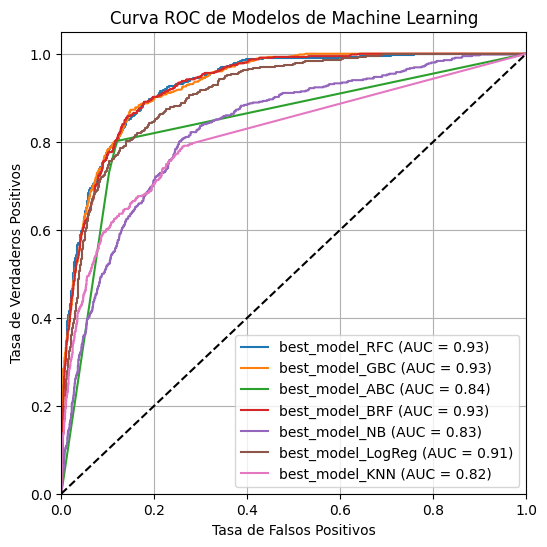

In [105]:
modelos = ["modeloRFC", "best_model_RFC", "modeloGBC", "best_model_GBC", "modeloABC", "best_model_ABC", "modeloBRF", "best_model_BRF", "modeloNB", "best_model_NB", "modeloSVC", "best_model_SVC", "modeloLogReg", "best_model_LogReg", "modeloKNN", "best_model_KNN"]
roc_curves = {
    "best_model_RFC": (fpr_best_model_RFC, tpr_best_model_RFC),
    "best_model_GBC": (fpr_best_model_GBC, tpr_best_model_GBC),
    "best_model_ABC": (fpr_best_model_ABC, tpr_best_model_ABC),
    "best_model_BRF": (fpr_best_model_BRF, tpr_best_model_BRF),
    "best_model_NB": (fpr_best_model_NB, tpr_best_model_NB),
    "best_model_LogReg": (fpr_best_model_LogReg, tpr_best_model_LogReg),
    "best_model_KNN": (fpr_best_model_KNN, tpr_best_model_KNN),}

plt.figure(figsize=(6, 6))

for modelo, (fpr, tpr) in roc_curves.items():
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{modelo} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC de Modelos de Machine Learning')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Modelo elegido: Balanced Random Forrest

## Clusterización

In [126]:
dfcluster = df_transformado
dfcluster

In [128]:
from sklearn.cluster import KMeans
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=1)
kmeans.fit(dfcluster)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


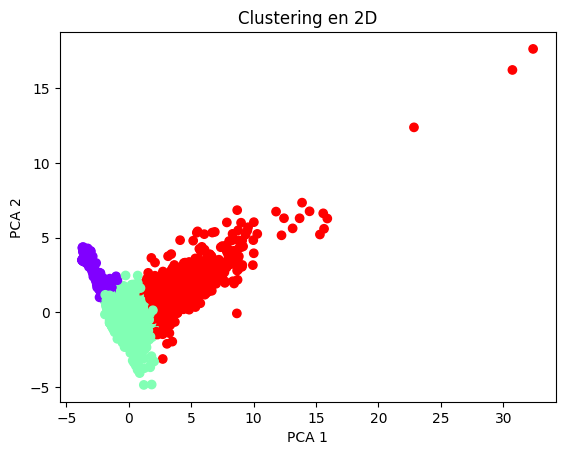

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dfcluster_2d = pca.fit_transform(dfcluster)

cluster_labels = kmeans.labels_

plt.scatter(dfcluster_2d[:, 0], dfcluster_2d[:, 1], c=cluster_labels, cmap='rainbow')
plt.title("Clustering en 2D")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

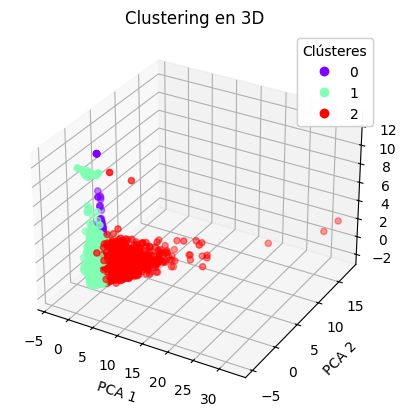

In [130]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
dfcluster_3d = pca.fit_transform(dfcluster)
cluster_labels = kmeans.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(dfcluster_3d[:, 0], dfcluster_3d[:, 1], dfcluster_3d[:, 2], c=cluster_labels, cmap='rainbow')

ax.set_title("Clustering en 3D")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

legend = ax.legend(*scatter.legend_elements(), title="Clústeres")
ax.add_artist(legend)
plt.show()

In [131]:
dfcluster['Cluster_Label'] = cluster_labels

In [132]:
dfcluster

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Cluster_Label
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,True,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,True,1
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,True,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,True,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,...,False,False,False,False,False,False,False,False,True,1
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,...,False,False,False,False,True,False,False,False,True,1
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,...,False,False,False,False,True,False,False,False,True,1
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,...,False,False,False,False,True,False,False,False,True,1


In [142]:
dfcluster0 = dfcluster[dfcluster['Cluster_Label'] == 0]
dfcluster0

In [144]:
dfcluster0.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster_Label
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1.058000e+03,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0
mean,-0.681343,-0.448752,-0.383827,-0.244278,-0.643312,-0.594335,2.961412,2.814585,-3.171778e-01,0.260446,0.066174,-0.024663,-0.040110,0.243604,-0.159049,0.005671,0.0
std,0.097181,0.124705,0.120422,0.010763,0.103354,0.101606,1.064731,0.649125,5.553740e-17,1.281836,1.164860,1.061219,0.981734,1.238264,0.879835,0.075128,0.0
min,-0.696993,-0.457191,-0.396478,-0.244931,-0.713488,-0.624348,-0.457683,0.907646,-3.171778e-01,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629,-0.550552,0.000000,0.0
25%,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,2.017240,2.200394,-3.171778e-01,-0.308821,-1.233426,-0.207952,-0.894178,-0.762629,-0.550552,0.000000,0.0
50%,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-3.171778e-01,-0.308821,-0.136078,-0.207952,-0.061364,-0.265735,-0.550552,0.000000,0.0
75%,-0.696993,-0.457191,-0.396478,-0.244931,-0.646033,-0.611414,3.667189,3.229316,-3.171778e-01,-0.308821,0.961270,-0.207952,0.355044,0.976499,-0.550552,0.000000,0.0
max,0.808283,3.014325,1.178195,-0.001935,0.882961,0.552121,3.667189,3.229316,-3.171778e-01,4.718598,6.448010,6.197799,2.437081,3.957861,1.816360,1.000000,0.0


In [145]:
dfcluster1 = dfcluster[dfcluster['Cluster_Label'] == 1]
dfcluster1

In [147]:
dfcluster1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster_Label
count,9668.000000,9668.000000,9668.000000,9668.000000,9668.000000,9668.000000,9668.000000,9668.000000,9668.000000,9668.000000,9668.000000,9668.000000,9668.000000,9668.000000,9668.000000,9668.000000,9668.0
mean,-0.178460,-0.164139,-0.224156,-0.186304,-0.174495,-0.166085,-0.269470,-0.227085,0.000521,-0.001082,-0.004982,0.015576,0.020299,-0.006804,0.006412,0.149566,1.0
std,0.704138,0.523215,0.487550,0.260431,0.508766,0.492557,0.311777,0.511645,1.031249,1.001543,1.001438,1.016052,1.009612,0.983144,1.004081,0.356664,0.0
min,-0.696993,-0.457191,-0.396478,-0.244931,-0.713488,-0.624348,-0.457683,-0.886371,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629,-0.550552,0.000000,1.0
25%,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.509642,-0.457683,-0.602530,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182,-0.550552,0.000000,1.0
50%,-0.395938,-0.434563,-0.396478,-0.244931,-0.331240,-0.330406,-0.457683,-0.371910,-0.317178,-0.308821,-0.136078,-0.207952,-0.061364,-0.514182,-0.550552,0.000000,1.0
75%,0.206173,-0.061201,-0.396478,-0.244931,0.006038,0.005718,-0.191562,-0.000355,-0.317178,-0.308821,-0.136078,-0.207952,0.355044,-0.017289,-0.550552,0.000000,1.0
max,3.517781,5.160216,3.540205,5.751790,3.243907,3.303127,1.604753,1.857420,19.166337,4.718598,6.448010,6.197799,2.437081,3.957861,1.816360,1.000000,1.0


In [148]:
dfcluster2 = dfcluster[dfcluster['Cluster_Label'] == 2]
dfcluster2

In [150]:
dfcluster2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster_Label
count,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.0
mean,1.525073,1.285333,1.604260,1.284058,1.476085,1.393090,-0.329136,-0.487763,0.206069,-0.165270,-0.013619,-0.077615,-0.095891,-0.119672,0.066262,0.284289,2.0
std,1.367408,2.020437,1.809209,2.320383,1.867308,1.969902,0.153222,0.240170,1.081472,0.697916,0.863689,0.845939,0.946838,0.893326,1.039306,0.451216,0.0
min,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.610042,-0.457683,-0.886371,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629,-0.550552,0.000000,2.0
25%,0.507228,0.063253,0.390859,-0.195195,0.185920,0.195776,-0.443410,-0.651432,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182,-0.550552,0.000000,2.0
50%,1.410394,0.665253,1.178195,0.439470,0.995387,0.850574,-0.374599,-0.526029,-0.219052,-0.308821,-0.136078,-0.207952,-0.477771,-0.514182,-0.550552,0.000000,2.0
75%,2.313560,1.639472,2.752868,1.636594,2.187102,2.026893,-0.276067,-0.372915,0.250358,-0.308821,-0.136078,-0.207952,0.355044,-0.017289,1.816360,1.000000,2.0
max,7.431499,18.769559,18.499599,17.868683,15.138577,32.806777,0.734434,1.171473,12.972503,4.718598,6.448010,6.197799,2.437081,3.957861,1.816360,1.000000,2.0


c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

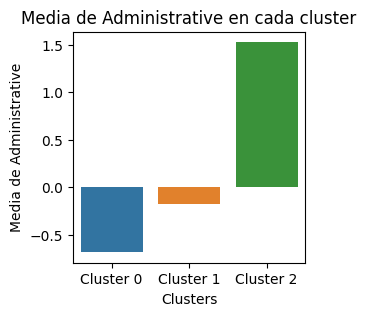

c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

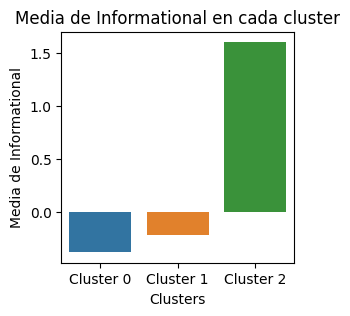

c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

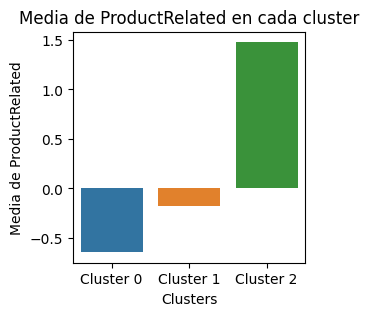

c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

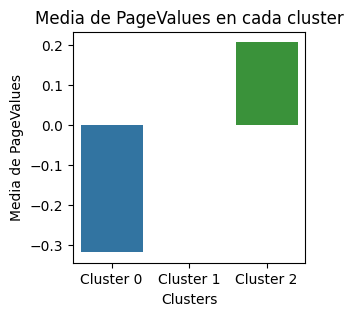

c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\axa\miniconda3\envs\modeloml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

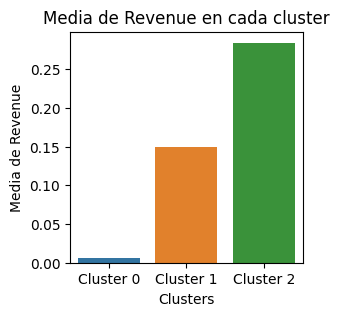

In [156]:
variables = ['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']

for variable in variables:
    data = [
        dfcluster0[variable].mean(),
        dfcluster1[variable].mean(),
        dfcluster2[variable].mean()
    ]
    clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']

    plt.figure(figsize=(3, 3))
    sns.barplot(x=clusters, y=data)
    plt.title(f'Media de {variable} en cada cluster')
    plt.xlabel('Clusters')
    plt.ylabel(f'Media de {variable}')
    plt.show()


##  Trazabilidad

In [ ]:
# mlflow.sklearn.save_model(modelo_entrenado, "ruta_del_modelo")

In [ ]:
# mlflow.end_run()